In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,confusion_matrix,recall_score,f1_score,classification_report
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import randint

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Authors_dataset.csv')
df.head(2)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL


In [3]:
df.drop(['id'],axis=1,inplace=True)

In [4]:
y=df['author']
df.drop(columns='author',inplace=True)

In [5]:
df

,text
0,"This process, however, afforded me no means of..."
1,It never once occurred to me that the fumbling...
2,"In his left hand was a gold snuff box, from wh..."
3,How lovely is spring As we looked from Windsor...
4,"Finding nothing else, not even gold, the Super..."
...,...
19574,"I could have fancied, while I looked at it, th..."
19575,The lids clenched themselves together as if in...
19576,"Mais il faut agir that is to say, a Frenchman ..."
19577,"For an item of news like this, it strikes us i..."


# Tokenize

In [6]:
regexp=RegexpTokenizer(r'\w+')
stopwords_en=stopwords.words('english')
lemmatizer=WordNetLemmatizer()      
vectorizer=TfidfVectorizer()

# Train Test Split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=42)

# Preprocessing

In [8]:
def preprocessing(review):
    
    tokens=regexp.tokenize(review)
    
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords_en]
    
    lemma_tokens=[lemmatizer.lemmatize(pure_token,pos='v') for pure_token in pure_tokens]
    
    return ' '.join(lemma_tokens)

In [9]:
X_train['text']=X_train['text'].apply(preprocessing)

X_test['text']=X_test['text'].apply(preprocessing)

In [10]:
X_train_tfidf=vectorizer.fit_transform(X_train['text'])


X_test_tfidf=vectorizer.transform(X_test['text'])

# Fitting Model
## Logistic Regression

In [11]:
logreg=LogisticRegression()
logreg.fit(X_train_tfidf,y_train)
logreg_pred=logreg.predict(X_test_tfidf)
print('Train Score',logreg.score(X_train_tfidf,y_train))
print('Test Score',logreg.score(X_test_tfidf,y_test))

Train Score 0.9240886164847092
Test Score 0.8094994892747702


# Cofusion Matrix

In [12]:
confusion_matrix(y_test,logreg_pred)

array([[1353,  110,  107],
       [ 179,  832,   60],
       [ 210,   80,  985]], dtype=int64)

In [13]:
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

         EAP       0.78      0.86      0.82      1570
         HPL       0.81      0.78      0.80      1071
         MWS       0.86      0.77      0.81      1275

    accuracy                           0.81      3916
   macro avg       0.82      0.80      0.81      3916
weighted avg       0.81      0.81      0.81      3916



# Schochastic Gradient Descent Classifier(SGDClassifier)


In [14]:
sgd_reg=SGDClassifier(alpha=1)
sgd_reg.fit(X_train_tfidf,y_train)
pred=sgd_reg.predict(X_test_tfidf)
pred

array(['EAP', 'EAP', 'EAP', ..., 'EAP', 'EAP', 'EAP'], dtype='<U3')

# 2. Decision Tree Classifier

In [15]:
ds_tree=DecisionTreeClassifier()
ds_tree.fit(X_train_tfidf,y_train)
pred=ds_tree.predict(X_test_tfidf)
print('Train score',ds_tree.score(X_train_tfidf,y_train))
print('Test Score',ds_tree.score(X_test_tfidf,y_test))


Train score 0.9997446210815297
Test Score 0.6003575076608785


# Hyperparameter Tunning DS Tree

In [16]:
ds_tree=DecisionTreeClassifier()

param_dist={"max_depth":[3,None],
            "min_samples_leaf": randint(1,9),
            "criterion":["gini","entropy"]
           }
rscv=RandomizedSearchCV(ds_tree,param_distributions=param_dist,cv=5)
rscv.fit(X_train_tfidf,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A2E2A18190>})

In [17]:
print(rscv.best_params_)
print(rscv.best_estimator_)
print(rscv.best_score_)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2}
DecisionTreeClassifier(min_samples_leaf=2)
0.5914579442909675


# 3. Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
pred=rf.predict(X_test_tfidf)
print('Train Score',rf.score(X_train_tfidf,y_train))
print('Test Score',rf.score(X_test_tfidf,y_test))

Train Score 0.9997446210815297
Test Score 0.7216547497446374


In [19]:
confusion_matrix(y_test,pred)

array([[1310,  124,  136],
       [ 293,  695,   83],
       [ 338,  116,  821]], dtype=int64)

In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         EAP       0.67      0.83      0.75      1570
         HPL       0.74      0.65      0.69      1071
         MWS       0.79      0.64      0.71      1275

    accuracy                           0.72      3916
   macro avg       0.74      0.71      0.72      3916
weighted avg       0.73      0.72      0.72      3916



# Hyperparameter Tunnig Random Forest

In [21]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier(random_state=42)
param_dict={
            'n_estimators':[50,60,70,100],
            'min_samples_split':[4,7,9],
            'max_depth':[7,8,9,10],
            'max_features':['auto','sqrt','log2']
}
rdsc=RandomizedSearchCV(rf,param_distributions=param_dict,cv=5,verbose=5)
rdsc.fit(X_train_tfidf,y_train)
pred=rdsc.predict(X_test_tfidf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=8, max_features=auto, min_samples_split=9, n_estimators=70; total time=   2.9s
[CV 2/5] END max_depth=8, max_features=auto, min_samples_split=9, n_estimators=70; total time=   2.7s
[CV 3/5] END max_depth=8, max_features=auto, min_samples_split=9, n_estimators=70; total time=   3.1s
[CV 4/5] END max_depth=8, max_features=auto, min_samples_split=9, n_estimators=70; total time=   3.2s
[CV 5/5] END max_depth=8, max_features=auto, min_samples_split=9, n_estimators=70; total time=   3.3s
[CV 1/5] END max_depth=8, max_features=sqrt, min_samples_split=7, n_estimators=50; total time=   2.2s
[CV 2/5] END max_depth=8, max_features=sqrt, min_samples_split=7, n_estimators=50; total time=   1.7s
[CV 3/5] END max_depth=8, max_features=sqrt, min_samples_split=7, n_estimators=50; total time=   1.7s
[CV 4/5] END max_depth=8, max_features=sqrt, min_samples_split=7, n_estimators=50; total time=   1.7s
[CV 5/5] END max_dept

In [22]:
print(rdsc.best_params_)
print(rdsc.best_estimator_)
print(rdsc.best_score_)

{'n_estimators': 50, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 10}
RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=4,
                       n_estimators=50, random_state=42)
0.4607671640294333


# 5. Gradiant Boost Classifier

In [23]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train_tfidf,y_train)
pred=gbc.predict(X_test_tfidf)
print('Train Score',gbc.score(X_train_tfidf,y_train))
print('Test Score',gbc.score(X_test_tfidf,y_test))

Train Score 0.6634744301857881
Test Score 0.6205311542390194


In [24]:
confusion_matrix(y_test,pred)

array([[1425,   74,   71],
       [ 551,  472,   48],
       [ 658,   84,  533]], dtype=int64)

# 6. XGBoost Classifier


In [25]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train_tfidf,y_train)
pred=xgb.predict(X_test_tfidf)
print('Train Score',xgb.score(X_train_tfidf,y_train))
print('Test Score',xgb.score(X_test_tfidf,y_test))

[21:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Score 0.8078273638511141
Test Score 0.7027579162410623


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         EAP       0.63      0.86      0.73      1570
         HPL       0.76      0.61      0.67      1071
         MWS       0.81      0.58      0.68      1275

    accuracy                           0.70      3916
   macro avg       0.73      0.69      0.69      3916
weighted avg       0.73      0.70      0.70      3916



# 7. Naive Bayes Classifier

In [27]:
#X_train_tfidf_converted=X_train_tfidf.toarray()
#X_test_tfidf_converted=X_test_tfidf.toarray()


In [28]:
#gnb=GaussianNB()
#gnb.fit(X_train_tfidf_converted,y_train)
#pred=gnb.predict(X_test_tfidf_converted)
#print('Train score',gnb.score(X_train_tfidf_converted,y_train))
#print('Test Score',gnb.score(X_test_tfidf_converted,y_test))

# 8. Support Vector Machine


In [29]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train_tfidf,y_train)
pred=svc.predict(X_test_tfidf)
print('Train score',svc.score(X_train_tfidf,y_train))
print('Test Score',svc.score(X_test_tfidf,y_test))

Train score 0.9905509800165996
Test Score 0.8036261491317671


# Hyperparameter Tuning (SVC)


In [30]:
param_dict={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}
rscv=RandomizedSearchCV(svc,param_dict,refit=True,verbose=3)
rscv.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time= 1.1min
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time= 1.2min
[CV 3/5] END ................C=1000, gamma=0.001, kernel=rbf; total time= 1.1min
[CV 4/5] END ................C=1000, gamma=0.001, kernel=rbf; total time= 1.2min
[CV 5/5] END ................C=1000, gamma=0.001, kernel=rbf; total time= 1.3min
[CV 1/5] END .......................C=1, gamma=1, kernel=rbf; total time= 2.3min
[CV 2/5] END .......................C=1, gamma=1, kernel=rbf; total time= 2.0min
[CV 3/5] END .......................C=1, gamma=1, kernel=rbf; total time= 2.3min
[CV 4/5] END .......................C=1, gamma=1, kernel=rbf; total time= 1.9min
[CV 5/5] END .......................C=1, gamma=1, kernel=rbf; total time= 2.0min
[CV 1/5] END ...................C=100, gamma=0.1, kernel=rbf; total time= 1.7min
[CV 2/5] END ...................C=100, gamma=0.1

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   verbose=3)

In [31]:
print(rscv.best_params_)
print(rscv.best_estimator_)
print(rscv.best_score_)

{'kernel': 'rbf', 'gamma': 1, 'C': 1}
SVC(C=1, gamma=1)
0.795058861320129


# 9. K Nearest Neighbors Classifier (KNN)


In [32]:
knn=KNeighborsClassifier()
knn.fit(X_train_tfidf,y_train)
pred=knn.predict(X_test_tfidf)
print('Train Score',knn.score(X_train_tfidf,y_train))
print('Test Score',knn.score(X_test_tfidf,y_test))


Train Score 0.5881376492370555
Test Score 0.501532175689479


# Unsupervised ML Model
## K-Mean Clustering

Text(0.5, 1.0, 'Elbow Curve')

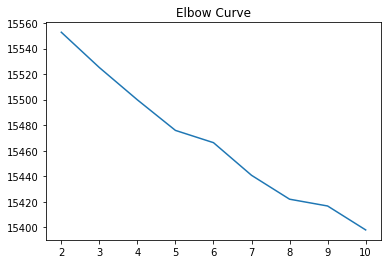

In [33]:
from sklearn.cluster import KMeans
kmns=KMeans()
kmns.fit(X_train_tfidf)

#finding the optimul number of clusters

num_clusters=range(2,11)

wss=[]  # Within Sum Of Square(WSS)

for n in num_clusters:
    kmns=KMeans(n_clusters=n)
    kmns.fit(X_train_tfidf)
    wss.append(kmns.inertia_)
    
plt.plot(num_clusters,wss)
plt.title('Elbow Curve')
    